<a href="https://colab.research.google.com/github/itsyoru/no-shows/blob/main/NoShows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016 (1).csv


In [3]:
import pandas as pd
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

In [75]:
df.tail(5)

,PatientId,Gender,ScheduledDateTime,AppointmentDateTime,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,IsChild,IsTeen,IsYoungAdult,IsAdult,IsElderly,HadPrevNoShows,SMS_and_PrevNoShows,IsFirstAppointment,ScheduledHourBin,AgeGroup
110522,999931985292928,1,2016-06-03 16:04:03+00:00,2016-06-07 00:00:00+00:00,90,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Afternoon,Elderly
110523,999934989273974,1,2016-04-29 09:07:06+00:00,2016-04-29 00:00:00+00:00,5,0,0,0,0,0,...,1,0,0,0,0,0,0,1,Morning,Child
110524,999946536742891,1,2016-05-03 07:08:13+00:00,2016-05-03 00:00:00+00:00,65,1,1,0,0,0,...,0,0,0,0,1,0,0,1,Morning,Elderly
110525,999968578354866,0,2016-05-25 15:51:24+00:00,2016-05-25 00:00:00+00:00,81,0,0,0,0,0,...,0,0,0,0,1,0,0,1,Afternoon,Elderly
110526,999981631772427,0,2016-05-05 07:04:46+00:00,2016-05-05 00:00:00+00:00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,Morning,Child


In [76]:
df.shape

(110527, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['No-show'].value_counts(normalize=True)

,proportion
No-show,
No,0.798067
Yes,0.201933


In [11]:
df = df.drop(columns=['AppointmentID', 'Neighbourhood'])

In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
print(df[['ScheduledDay', 'AppointmentDay']].dtypes)

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object


In [14]:
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df['DaysBetween'] = df['DaysBetween'].clip(lower=0)

In [15]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

print(df['No-show'].value_counts())

No-show
0    88208
1    22319
Name: count, dtype: int64


In [16]:
# 0 = female, 1 = males
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [17]:
df = df.sort_values(by=['PatientId', 'ScheduledDay']).reset_index(drop=True)

df['NumPrevAppointments'] = 0
df['NumPrevNoShows'] = 0
df['NoShowRate'] = 0.0

In [18]:
grouped = df.groupby('PatientId')

In [19]:
df['NumPrevAppointments'] = grouped.cumcount()

shifted_no_show = grouped['No-show'].shift(1).fillna(0)
df['NumPrevNoShows'] = shifted_no_show.groupby(df['PatientId']).cumsum()

df['NoShowRate'] = df['NumPrevNoShows'] / df['NumPrevAppointments']
df['NoShowRate'] = df['NoShowRate'].fillna(0)

In [20]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,NumPrevAppointments,NumPrevNoShows,NoShowRate
0,39217.84439,0,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,0,0,0,0,0,0,0,2,0,0.0,0.0
1,43741.75652,1,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,0,0,1,0,0,0,0,0,0,0.0,0.0
2,93779.52927,0,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,0,0,0,0,0,0,0,0,0,0.0,0.0
3,141724.16655,1,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,0,0,0,0,0,0,0,2,0,0.0,0.0
4,537615.28476,0,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,0,0,0,0,0,1,0,6,0,0.0,0.0


In [21]:
num_patients_5plus = df[df['NumPrevAppointments'] >= 5]['PatientId'].nunique()
print(f"Patients with 5 or more previous appointments: {num_patients_5plus}")

Patients with 5 or more previous appointments: 1498


In [22]:
num_patients_2plus_noshow = df[df['NumPrevNoShows'] >= 2]['PatientId'].nunique()
print(f"Patients with 2 or more previous no-shows: {num_patients_2plus_noshow}")

Patients with 2 or more previous no-shows: 1702


In [23]:
num_patients_high_rate = df[df['NoShowRate'] > 0.5]['PatientId'].nunique()
print(f"Patients with no-show rate > 50%: {num_patients_high_rate}")

Patients with no-show rate > 50%: 6090


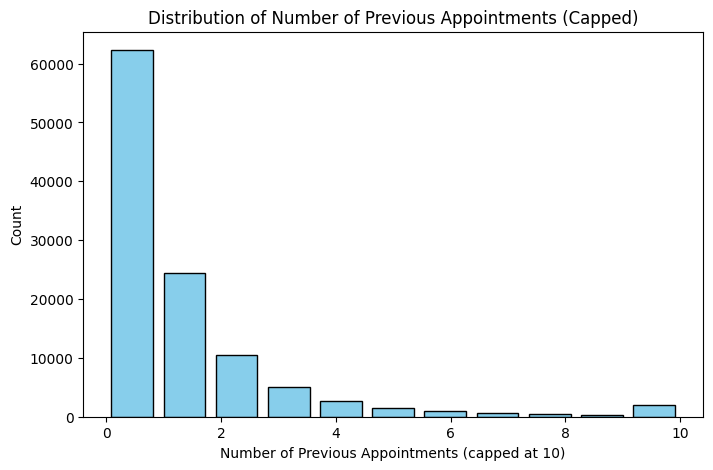

In [24]:
import matplotlib.pyplot as plt

capped_appointments = df['NumPrevAppointments'].clip(upper=10)

plt.figure(figsize=(8,5))
plt.hist(capped_appointments, bins=11, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Number of Previous Appointments (capped at 10)')
plt.ylabel('Count')
plt.title('Distribution of Number of Previous Appointments (Capped)')
plt.show()

In [25]:
df['PatientId'] = df['PatientId'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   PatientId            110527 non-null  int64              
 1   Gender               110527 non-null  int64              
 2   ScheduledDay         110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay       110527 non-null  datetime64[ns, UTC]
 4   Age                  110527 non-null  int64              
 5   Scholarship          110527 non-null  int64              
 6   Hipertension         110527 non-null  int64              
 7   Diabetes             110527 non-null  int64              
 8   Alcoholism           110527 non-null  int64              
 9   Handcap              110527 non-null  int64              
 10  SMS_received         110527 non-null  int64              
 11  No-show              110527 non-null  int64              
 12  Da

In [27]:
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,NumPrevAppointments,NumPrevNoShows,NoShowRate
0,39217,0,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,0,0,0,0,0,0,0,2,0,0.0,0.0
1,43741,1,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,0,0,1,0,0,0,0,0,0,0.0,0.0
2,93779,0,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,0,0,0,0,0,0,0,0,0,0.0,0.0
3,141724,1,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,0,0,0,0,0,0,0,2,0,0.0,0.0
4,537615,0,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,0,0,0,0,0,1,0,6,0,0.0,0.0


In [28]:
df['AppointmentWeekday'] = df['AppointmentDay'].dt.weekday
df.groupby('AppointmentWeekday')['No-show'].mean()

,No-show
AppointmentWeekday,
0,0.206471
1,0.200936
2,0.196892
3,0.193541
4,0.212261
5,0.230769


In [29]:
bins = [-1, 0, 3, 7, 14, 30, 90, 365]
labels = ['SameDay', '1-3d', '4-7d', '8-14d', '15-30d', '31-90d', '90+d']

df['WaitTimeBucket'] = pd.cut(df['DaysBetween'], bins=bins, labels=labels)

In [30]:
df.groupby('WaitTimeBucket')['No-show'].mean()

<ipython-input-30-3088645046>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('WaitTimeBucket')['No-show'].mean()


,No-show
WaitTimeBucket,
SameDay,0.066467
1-3d,0.235697
4-7d,0.264706
8-14d,0.312254
15-30d,0.325212
31-90d,0.331168
90+d,0.273292


In [31]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,NumPrevAppointments,NumPrevNoShows,NoShowRate,AppointmentWeekday,WaitTimeBucket
0,39217,0,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,0,0,0,0,0,0,0,2,0,0.0,0.0,4,1-3d
1,43741,1,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,0,0,1,0,0,0,0,0,0,0.0,0.0,2,SameDay
2,93779,0,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,0,0,0,0,0,0,0,0,0,0.0,0.0,2,SameDay
3,141724,1,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,0,0,0,0,0,0,0,2,0,0.0,0.0,0,1-3d
4,537615,0,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,0,0,0,0,0,1,0,6,0,0.0,0.0,4,4-7d


In [32]:
df['ChronicConditions'] = df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].sum(axis=1)

In [33]:
df.groupby('ChronicConditions')['No-show'].mean()

,No-show
ChronicConditions,
0,0.209273
1,0.179472
2,0.176913
3,0.169872
4,0.190476
5,1.000000


In [34]:
df['ChronicConditions'].value_counts().sort_index()

,count
ChronicConditions,
0,84115
1,18014
2,7710
3,624
4,63
5,1


In [35]:
df['IsChild'] = (df['Age'] < 12).astype(int)
df['IsTeen'] = ((df['Age'] >= 12) & (df['Age'] < 18)).astype(int)
df['IsYoungAdult'] = ((df['Age'] >= 18) & (df['Age'] < 30)).astype(int)
df['IsAdult'] = ((df['Age'] >= 30) & (df['Age'] < 65)).astype(int)
df['IsElderly'] = (df['Age'] >= 65).astype(int)

In [36]:
age_group_cols = ['IsChild', 'IsTeen', 'IsYoungAdult', 'IsAdult', 'IsElderly']

for col in age_group_cols:
    count = df[col].sum()
    no_show_rate = df[df[col] == 1]['No-show'].mean()
    print(f"{col}: Count = {count}, No-show Rate = {no_show_rate:.3f}")

IsChild: Count = 19945, No-show Rate = 0.202
IsTeen: Count = 7435, No-show Rate = 0.264
IsYoungAdult: Count = 16731, No-show Rate = 0.246
IsAdult: Count = 52014, No-show Rate = 0.192
IsElderly: Count = 14402, No-show Rate = 0.155


In [37]:
df['HadPrevNoShows'] = (df['NumPrevNoShows'] > 0).astype(int)

In [38]:
df['SMS_and_PrevNoShows'] = df['SMS_received'] * df['HadPrevNoShows']

In [39]:
df.groupby('SMS_and_PrevNoShows')['No-show'].mean()

,No-show
SMS_and_PrevNoShows,
0,0.195551
1,0.348033


In [40]:
df['IsFirstAppointment'] = (df['NumPrevAppointments'] == 0).astype(int)

df.groupby('IsFirstAppointment')['No-show'].agg(['count', 'mean'])

,count,mean
IsFirstAppointment,,
0,48228,0.193746
1,62299,0.208270


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   PatientId            110527 non-null  int64              
 1   Gender               110527 non-null  int64              
 2   ScheduledDay         110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay       110527 non-null  datetime64[ns, UTC]
 4   Age                  110527 non-null  int64              
 5   Scholarship          110527 non-null  int64              
 6   Hipertension         110527 non-null  int64              
 7   Diabetes             110527 non-null  int64              
 8   Alcoholism           110527 non-null  int64              
 9   Handcap              110527 non-null  int64              
 10  SMS_received         110527 non-null  int64              
 11  No-show              110527 non-null  int64              
 12  Da

In [42]:
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

hourly_no_show = df.groupby('ScheduledHour')['No-show'].mean()

print(hourly_no_show)

ScheduledHour
6     0.192015
7     0.151512
8     0.182683
9     0.196990
10    0.220695
11    0.227842
12    0.203615
13    0.209274
14    0.226800
15    0.231836
16    0.237640
17    0.248195
18    0.212687
19    0.233607
20    0.300000
21    0.333333
Name: No-show, dtype: float64


In [43]:
bins = [5, 11, 16, 21]  # 6-11: Morning, 12-16: Afternoon, 17-21: Evening
labels = ['Morning', 'Afternoon', 'Evening']

df['ScheduledHourBin'] = pd.cut(df['ScheduledHour'], bins=bins, labels=labels, right=True, include_lowest=True)

counts = df['ScheduledHourBin'].value_counts().sort_index()
print("Counts per ScheduledHourBin:\n", counts)

no_show_rates = df.groupby('ScheduledHourBin')['No-show'].mean()
print("\nNo-show rates per ScheduledHourBin:\n", no_show_rates)

Counts per ScheduledHourBin:
 ScheduledHourBin
Morning      68481
Afternoon    37206
Evening       4840
Name: count, dtype: int64

No-show rates per ScheduledHourBin:
 ScheduledHourBin
Morning      0.188549
Afternoon    0.221873
Evening      0.238017
Name: No-show, dtype: float64


<ipython-input-43-3399841532>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_rates = df.groupby('ScheduledHourBin')['No-show'].mean()


In [44]:
df.drop(columns=['ScheduledHour'], inplace=True)

In [45]:
df.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'No-show': 'NoShow',
    'ScheduledDay': 'ScheduledDateTime',
    'AppointmentDay': 'AppointmentDateTime'
}, inplace=True)

In [46]:
df.head()

,PatientId,Gender,ScheduledDateTime,AppointmentDateTime,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,ChronicConditions,IsChild,IsTeen,IsYoungAdult,IsAdult,IsElderly,HadPrevNoShows,SMS_and_PrevNoShows,IsFirstAppointment,ScheduledHourBin
0,39217,0,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Morning
1,43741,1,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,Afternoon
2,93779,0,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Morning
3,141724,1,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Morning
4,537615,0,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Morning


In [47]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

sms_counts = df.groupby('SMS_received')['NoShow'].agg(['sum', 'count'])
no_shows_sms = sms_counts.loc[1, 'sum']
no_shows_no_sms = sms_counts.loc[0, 'sum']

n_sms = sms_counts.loc[1, 'count']
n_no_sms = sms_counts.loc[0, 'count']

In [48]:
# Null Hypothesis: The no-show rate is the same whether or not a patient receives an SMS
# P-Value < 0.05 = Reject Null Hypothesis, shows the difference is statistically significant

count = np.array([no_shows_sms, no_shows_no_sms])
nobs = np.array([n_sms, n_no_sms])

stat, pval = proportions_ztest(count, nobs)

print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Z-statistic: 42.0326
P-value: 0.0000


In [52]:
# Null Hypothesis: There is no difference in no-show rates between different wait time buckets
# Using Chi-Square since this is categorical
# # P-Value < 0.05 = Reject Null Hypothesis, shows the difference is statistically significant

from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['WaitTimeBucket'], df['NoShow'])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-squared:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

Chi-squared: 8845.18987506549
Degrees of freedom: 6
p-value: 0.0


In [54]:
df.groupby('WaitTimeBucket')['NoShow'].mean().sort_values()

<ipython-input-54-1691902454>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('WaitTimeBucket')['NoShow'].mean().sort_values()


,NoShow
WaitTimeBucket,
SameDay,0.066467
1-3d,0.235697
4-7d,0.264706
90+d,0.273292
8-14d,0.312254
15-30d,0.325212
31-90d,0.331168


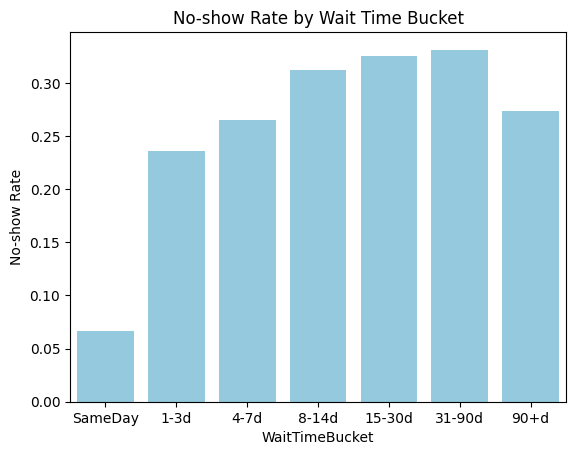

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='WaitTimeBucket', y='NoShow', data=df, errorbar=None, color='skyblue', estimator=lambda x: sum(x)/len(x))
plt.ylabel("No-show Rate")
plt.title("No-show Rate by Wait Time Bucket")
plt.show()

<ipython-input-68-1638659533>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


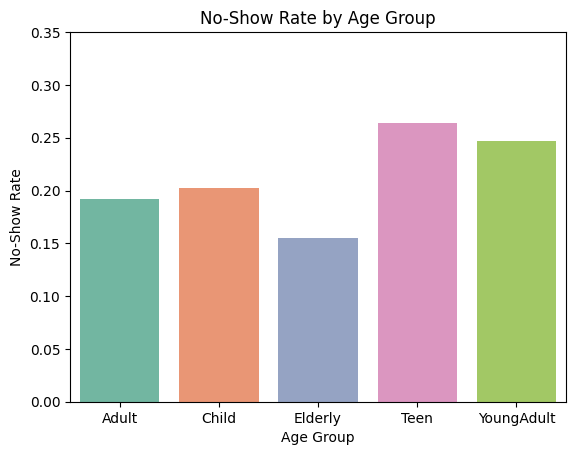

In [68]:
def get_age_group(row):
    if row['IsChild'] == 1:
        return 'Child'
    elif row['IsTeen'] == 1:
        return 'Teen'
    elif row['IsYoungAdult'] == 1:
        return 'YoungAdult'
    elif row['IsAdult'] == 1:
        return 'Adult'
    elif row['IsElderly'] == 1:
        return 'Elderly'
    else:
        return 'Unknown'

df['AgeGroup'] = df.apply(get_age_group, axis=1)

no_show_rates = df.groupby('AgeGroup')['NoShow'].mean().reset_index()

sns.barplot(
    x='AgeGroup',
    y='NoShow',
    data=no_show_rates,
    errorbar=None,
    palette='Set2',
    estimator=lambda x: sum(x) / len(x)
)

plt.title('No-Show Rate by Age Group')
plt.ylabel('No-Show Rate')
plt.xlabel('Age Group')

plt.ylim(0, 0.35)
plt.yticks([i / 20 for i in range(0, 8)])

plt.show()

In [69]:
# Null Hypothesis: No Shows are independent from Age Groups
# # P-Value < 0.05 = Reject Null hypothesis, shows the difference is statistically significant

contingency_table = pd.crosstab(df['AgeGroup'], df['NoShow'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.10f}")

Chi-square statistic: 614.2215
Degrees of freedom: 4
P-value: 0.0000000000


In [73]:
# Null Hypothesis: The proportion of no-shows is the same for both genders
# Using a two-proportion z-test for this since we're seeing whether 2 populations proportions are equal
# Higher than expected P-Value, there may not be enough statistical evidence to say that no-shows differ between genders

gender_0 = df[df['Gender'] == 0]['NoShow']
gender_1 = df[df['Gender'] == 1]['NoShow']

count = [gender_0.sum(), gender_1.sum()]
nobs = [len(gender_0), len(gender_1)]

stat, pval = proportions_ztest(count, nobs)

print(f"Z-test statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Z-test statistic: 1.3693
P-value: 0.1709
